# Часть 1

Здесь **самостоятельно** реализован алгоритм кластеризации KMeans.  

Алгоритм K-Means.  
  
Параметры: 
- **k:** число центров (кластеров);
- **init**: метод инициализации центров - random или kmeans++;
- **n_init**: число запусков алгоритма;
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.  
  
Атрибуты:  
- **inertia_:** Итоговое значение целевой функции;
- **cluster\_centers\_:** центры кластеров - ndarray of shape (n_clusters, n_features);
- **labels_:** метки кластеров для каждого объекта.  
  
Метод `predict()`:  Новый объект определяется в кластер, центр которого расположен ближе всех к этому объекту. 

In [1]:
from sklearn.base import BaseEstimator, ClusterMixin 
import math
#from sklearn.cluster import _kmeans_plusplus

class My_Clust(BaseEstimator, ClusterMixin):
    """
    My implementation of clustering algorithm  
    """
    
    def __init__(self, k=8, init='random', n_init=10, max_iter=300, tol=0.0001):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.init = init
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.inertia_ = 0.0  
        self.cluster_centers_ = [[]]  
        self.labels_ = []

    def _find_init_cluster_centers(self, X, init):
        n_samples = len(X)
        n_clusters = self.k

        if isinstance(init, str) and init == 'random':
            centers = X[np.random.permutation(n_samples)][:n_clusters]
            
        elif isinstance(init, str) and init == 'kmeans++':
            centers, _ = kmeans_plusplus(X, n_clusters)

        return centers

    def _make_labels(self, X, centers):
        mapping = []
        features = len(X[0])
        inertia = 0
        
        for s in X:
            distances = []
            inertia_list = []
            
            for c in centers:
                distance = sum([(s[p] - c[1][p]) ** 2 for p in range(features)])
                distances.append(np.sqrt(distance))
                inertia_list.append(distance)
            
            min_distance = distances.index(min(distances))
            mapping.append((s, min_distance))
            
            min_square_distance = inertia_list.index(min(inertia_list))
            inertia += min_distance

        return mapping, inertia

    def _compute_centers(self, labels):
        n_clusters = self.k
        new_centers = []
        n_features = len(labels[0][0])
        for n in range(n_clusters):
            cluster = list(filter(lambda x: x[1] == n, labels))
            new_centers.append((n, np.array([np.mean([x[0][p] for x in cluster]) for p in range(n_features)])))
        return new_centers

    def fit(self, X):
        """
        Use data matrix X to compute model parameters
        """
        self.n_init += 1
        
        self.cluster_centers_ = self._find_init_cluster_centers(X, self.init)
        centers = [(i, c) for i, c in enumerate(self.cluster_centers_.copy())]

        for _ in range(self.max_iter):
            labels, inertia = self._make_labels(X, centers)

            new_centers = self._compute_centers(labels)
            
            center_distanes = np.sqrt(sum([(centers[p][1] - new_centers[p][1]) ** 2  for p in range(len(centers))]))

            if all([d <= self.tol for d in center_distanes]):
                self.cluster_centers_ = np.array([c[1] for c in centers])
                self.labels_ = [l[1] for l in labels]
                self.inertia_ = inertia
                return
            
            centers = new_centers.copy()

    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from matrix X
        return
        """
        centers = [(i, c) for i, c in enumerate(self.cluster_centers_)]
        labels_, self.inertia_ = self._make_labels(X, centers)
        
        self.labels_ = np.array([x[1] for x in labels])

        return  self.labels_


### Тестирование 

Результаты кластеризации должны совпадать кастомного и библиотечного алгоритмов должны совпадать.  

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.cluster import KMeans

In [3]:
iris = load_iris()
X = iris.data # использовать для кластеризации
y = iris.target # истинные метки цветков

In [4]:
kmeans = KMeans(n_clusters=3, init='random')
clust = My_Clust(k=3)

kmeans.fit(X)
clust.fit(X)

kmeans.cluster_centers_, clust.cluster_centers_

(array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ]]),
 array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623]]))

In [5]:
X = pd.DataFrame(X, columns=iris.feature_names)
X['class'] = [iris.target_names[i] for i in y]

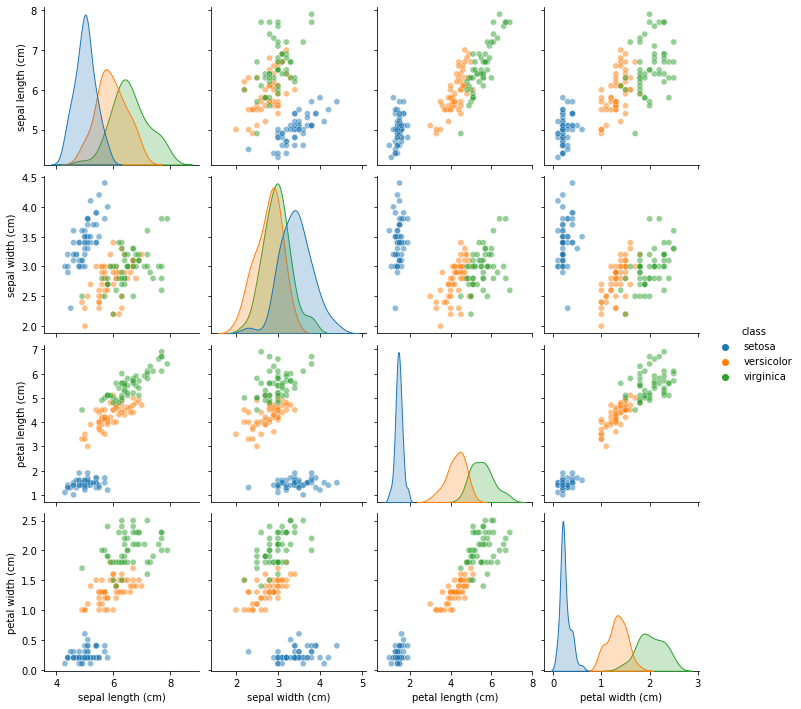

In [6]:
sns.pairplot(X, hue='class', plot_kws={'alpha':0.5}, vars=iris.feature_names)
plt.show()

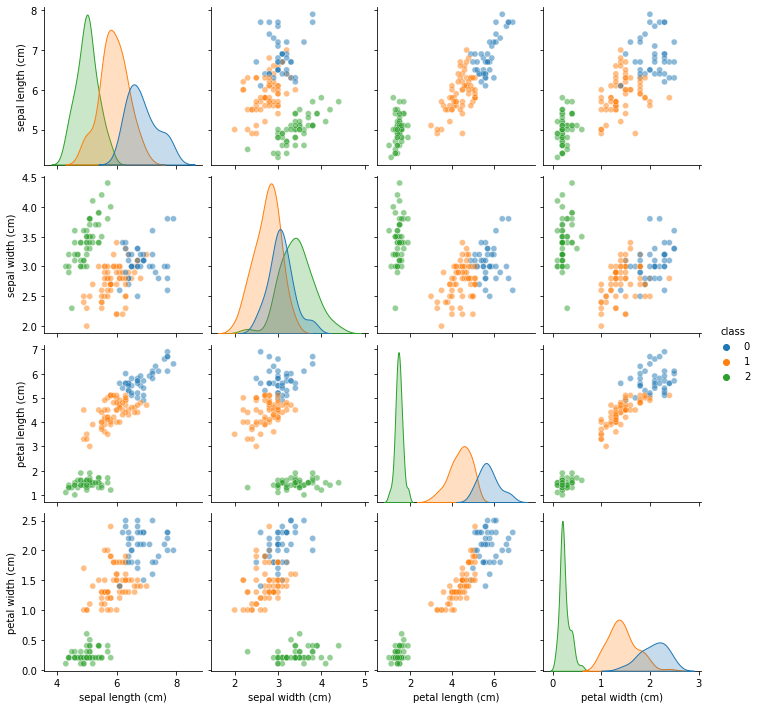

In [7]:
X['class'] = kmeans.labels_
sns.pairplot(X, hue='class', plot_kws={'alpha':0.5}, palette="tab10")
plt.show()

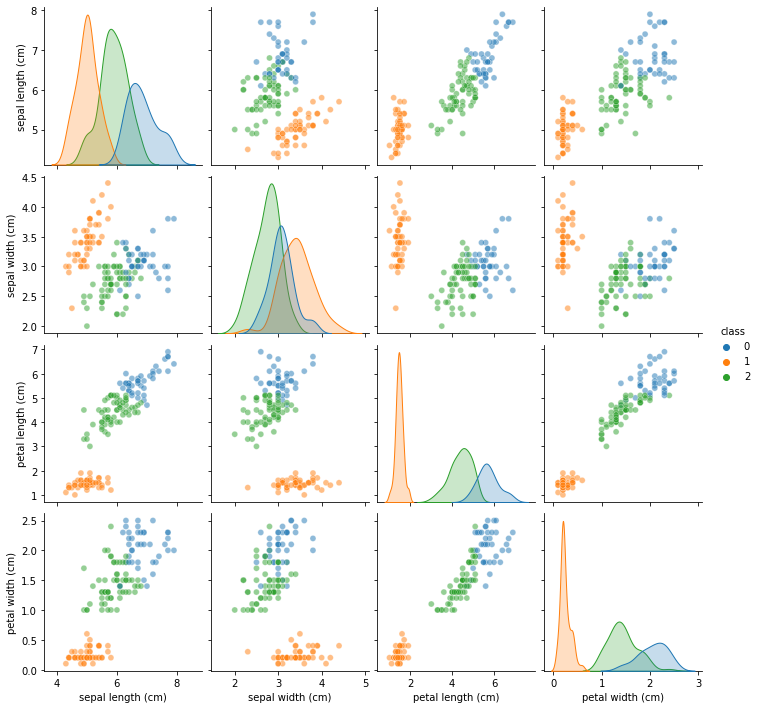

In [8]:
X['class'] = clust.labels_
sns.pairplot(X, hue='class', plot_kws={'alpha':0.5}, palette="tab10")
plt.show()

# Часть 2

Анализ датасета по различным городам США.

In [9]:
pd.set_option('display.max_colwidth', None)

In [14]:
data_desc = pd.read_csv('https://raw.githubusercontent.com/katearb/files/main/Data_usa_city_Description.txt', sep=':')
data_desc

Attribute  \
0                       Place   
1           Climate & Terrain   
2                     Housing   
3   Health Care & Environment   
4                       Crime   
5              Transportation   
6                   Education   
7                    The Arts   
8                  Recreation   
9                   Economics   
10                  Longitude   
11                   Latitude   
12                 Population   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Description  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                          City, state (postal code)  
1                                                                                                                                                                                                                                                                                                                              Very hot and very cold months, seasonal temperature variation, heating- and cooling-degree days, freezing days, zero-degree days, ninety-degree days.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                  Utility bills, property taxes, mortgage payments.  
3                                                                                                                                                                                                                                                Per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, flouridation of drinking water, air pollution.  
4                                                                                                                                                                                                                                                                                                                                                                                                                                           Violent crime rate, property crime rate.  
5                                                                                                                                                                                                                                                                                                                                                                                    Daily commute, public transportation, Interstate highways, air service, passenger rail service.  
6                                                                                                                                                                                                                                                                   

### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/katearb/files/main/Data_usa_city.txt', sep=' ')
data

Place  Climate  HousingCost  HlthCare  Crime  \
0                    Abilene,TX      521         6200       237    923   
1                      Akron,OH      575         8138      1656    886   
2                     Albany,GA      468         7339       618    970   
3    Albany-Schenectady-Troy,NY      476         7908      1431    610   
4                Albuquerque,NM      659         8393      1853   1483   
..                          ...      ...          ...       ...    ...   
324                Worcester,MA      562         8715      1805    680   
325                   Yakima,WA      535         6440       317   1106   
326                     York,PA      540         8371       713    440   
327        Youngstown-Warren,OH      570         7021      1097    938   
328                Yuba-City,CA      608         7875       212   1179   

     Transp  Educ  Arts  Recreat  Econ      Long      Lat     Pop  
0      4031  2757   996     1405  7633  -99.6890  32.5590  110932  
1      4883  2438  5564     2632  4350  -81.5180  41.0850  660328  
2      2531  2560   237      859  5250  -84.1580  31.5750  112402  
3      6883  3399  4655     1617  5864  -73.7983  42.7327  835880  
4      6558  3026  4496     2612  5727 -106.6500  35.0830  419700  
..      ...   ...   ...      ...   ...       ...      ...     ...  
324    3643  3299  1784      910  5040  -71.7950  42.2720  402918  
325    3731  2491   996     2140  4986 -120.5130  46.5950  172508  
326    2267  2903  1022      842  4946  -76.7280  39.9600  381255  
327    3374  2920  2797     1327  3894  -80.7290  41.1700  531350  
328    2768  2387   122      918  4694 -121.6220  39.1280  101979  

[329 rows x 13 columns]

<br>  
  
## Задания: 

1. Выполнить необходимую предобработку данных.
  
2. Выполнить кластеризацию иерархическим методом. (агломеративно) 
  
3. Выполнить кластеризацию методом Dbscan.
  
4. Выполнить кластеризацию методом kmeans.
  
5. Выполнить кластеризацию другими методами.
  
6. Сравнить результаты.  
  
7. Выбрать одно разбиение, наиболее подходящее на ваш взгляд. Проинтерпритировать.
  
8. Оценить, как полученные кластеры распределены географически.

In [15]:
!pip install folium

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import folium

## №1

In [17]:
df = data.drop(['Place', 'Long', 'Lat'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Climate      329 non-null    int64
 1   HousingCost  329 non-null    int64
 2   HlthCare     329 non-null    int64
 3   Crime        329 non-null    int64
 4   Transp       329 non-null    int64
 5   Educ         329 non-null    int64
 6   Arts         329 non-null    int64
 7   Recreat      329 non-null    int64
 8   Econ         329 non-null    int64
 9   Pop          329 non-null    int64
dtypes: int64(10)
memory usage: 25.8 KB


In [19]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

## №2

euclidean weighted


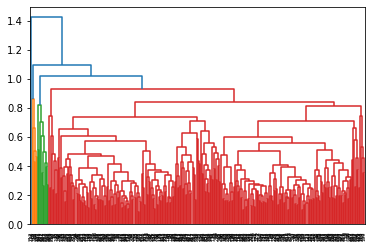

euclidean single


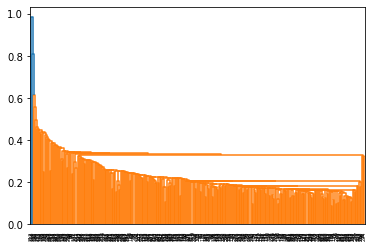

minkowski weighted


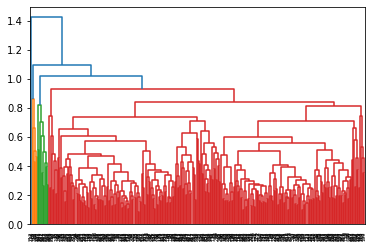

minkowski single


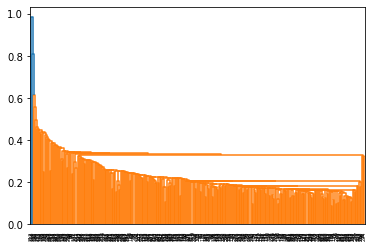

cityblock weighted


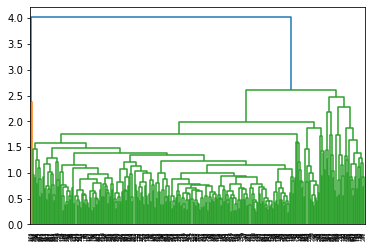

cityblock single


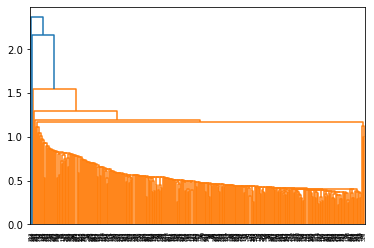

seuclidean weighted


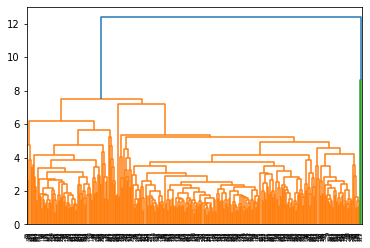

seuclidean single


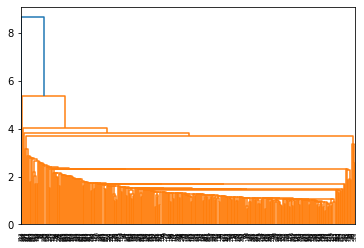

euclidean ward


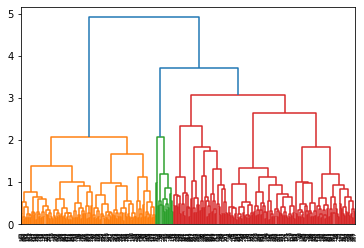

euclidean centroid


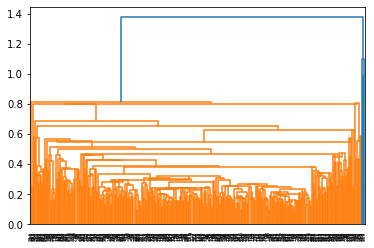

In [20]:
for m in ['euclidean', 'minkowski', 'cityblock', 'seuclidean']:
    for l in ['weighted', 'single']:
        print(m, l)
        distance_matrix = linkage(df, metric=m, method=l)
        dn = dendrogram(distance_matrix)
        plt.show()

for l in ['ward', 'centroid']:
        print('euclidean', l)
        distance_matrix = linkage(df, metric='euclidean', method=l)
        dn = dendrogram(distance_matrix)
        plt.show()

кажется, что Евклидово расстояние в совокупности с методом ward дает самый разумный результат из всех. Визуально четко выделяются 3-4 кластера. В то время как в остальных случаях, дендрограммы либо не способны выделить какие-то ни было кластеры, либо очень сильно их искажают.

[0.6342602660378628, 0.4096425727541542, 0.4066173623108926, 0.3327832822547907, 0.31280265675863367, 0.28100792432687166]


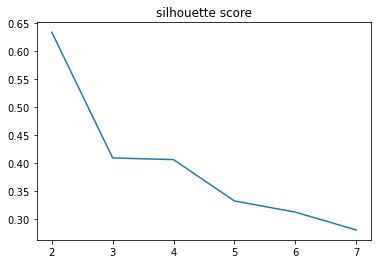

In [21]:
K = range(2, 8)
scores = []

for k in K:
    agglomerative = AgglomerativeClustering(linkage='average', n_clusters=k).fit(df)
    labels = agglomerative.labels_
    scores.append(silhouette_score(df, labels, metric = 'euclidean'))

print(scores)
plt.plot(K, scores)
plt.title('silhouette score')
plt.show()

Оптимальное количество кластеров = 3

In [22]:
agglomerative = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
agglomerative.fit(df)

AgglomerativeClustering(n_clusters=3)

## №3

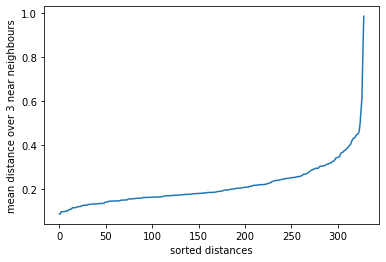

In [23]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, _ = nbrs.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('sorted distances')
plt.ylabel('mean distance over 3 near neighbours')
plt.show()

Оптимальное eps = 0.4

In [24]:
dbscan = DBSCAN(eps=0.4, min_samples=5, leaf_size=60)
dbscan.fit(df)

DBSCAN(eps=0.4, leaf_size=60)

## №4

In [25]:
kmean = KMeans(n_clusters=3)
kmean.fit(df)

KMeans(n_clusters=3)

## №5

In [26]:
gmm = GaussianMixture(n_components=3, init_params='kmeans')
gmm.fit(df)

GaussianMixture(n_components=3)

## № 6

In [27]:
agg_sil = silhouette_score(df, agglomerative.labels_, metric = 'euclidean')
print('silhouette score', agg_sil)

silhouette score 0.13781545274723117


In [28]:
print('silhouette score = 1, так как у нас всего 1 кластер')

silhouette score = 1, так как у нас всего 1 кластер


In [29]:
km_sil = kmean.labels_
silhouette_score(df, km_sil, metric = 'euclidean')

0.17996676101155756

In [30]:
gmm_sil = gmm.predict(df)
silhouette_score(df, gmm_sil, metric='euclidean')

0.0667132133661567

По значениям Силуэта видно, что все кластеризации примерно одинаково спраились с задачей (за исключением dbscan, который выделил только 1 кластер и выбросы). Лучше всех справился Gaussian Mixture.

|

|
 
 
Оценим распредление точек по кластерам с помощью pairplot.

1. Агломеративная кластеризация

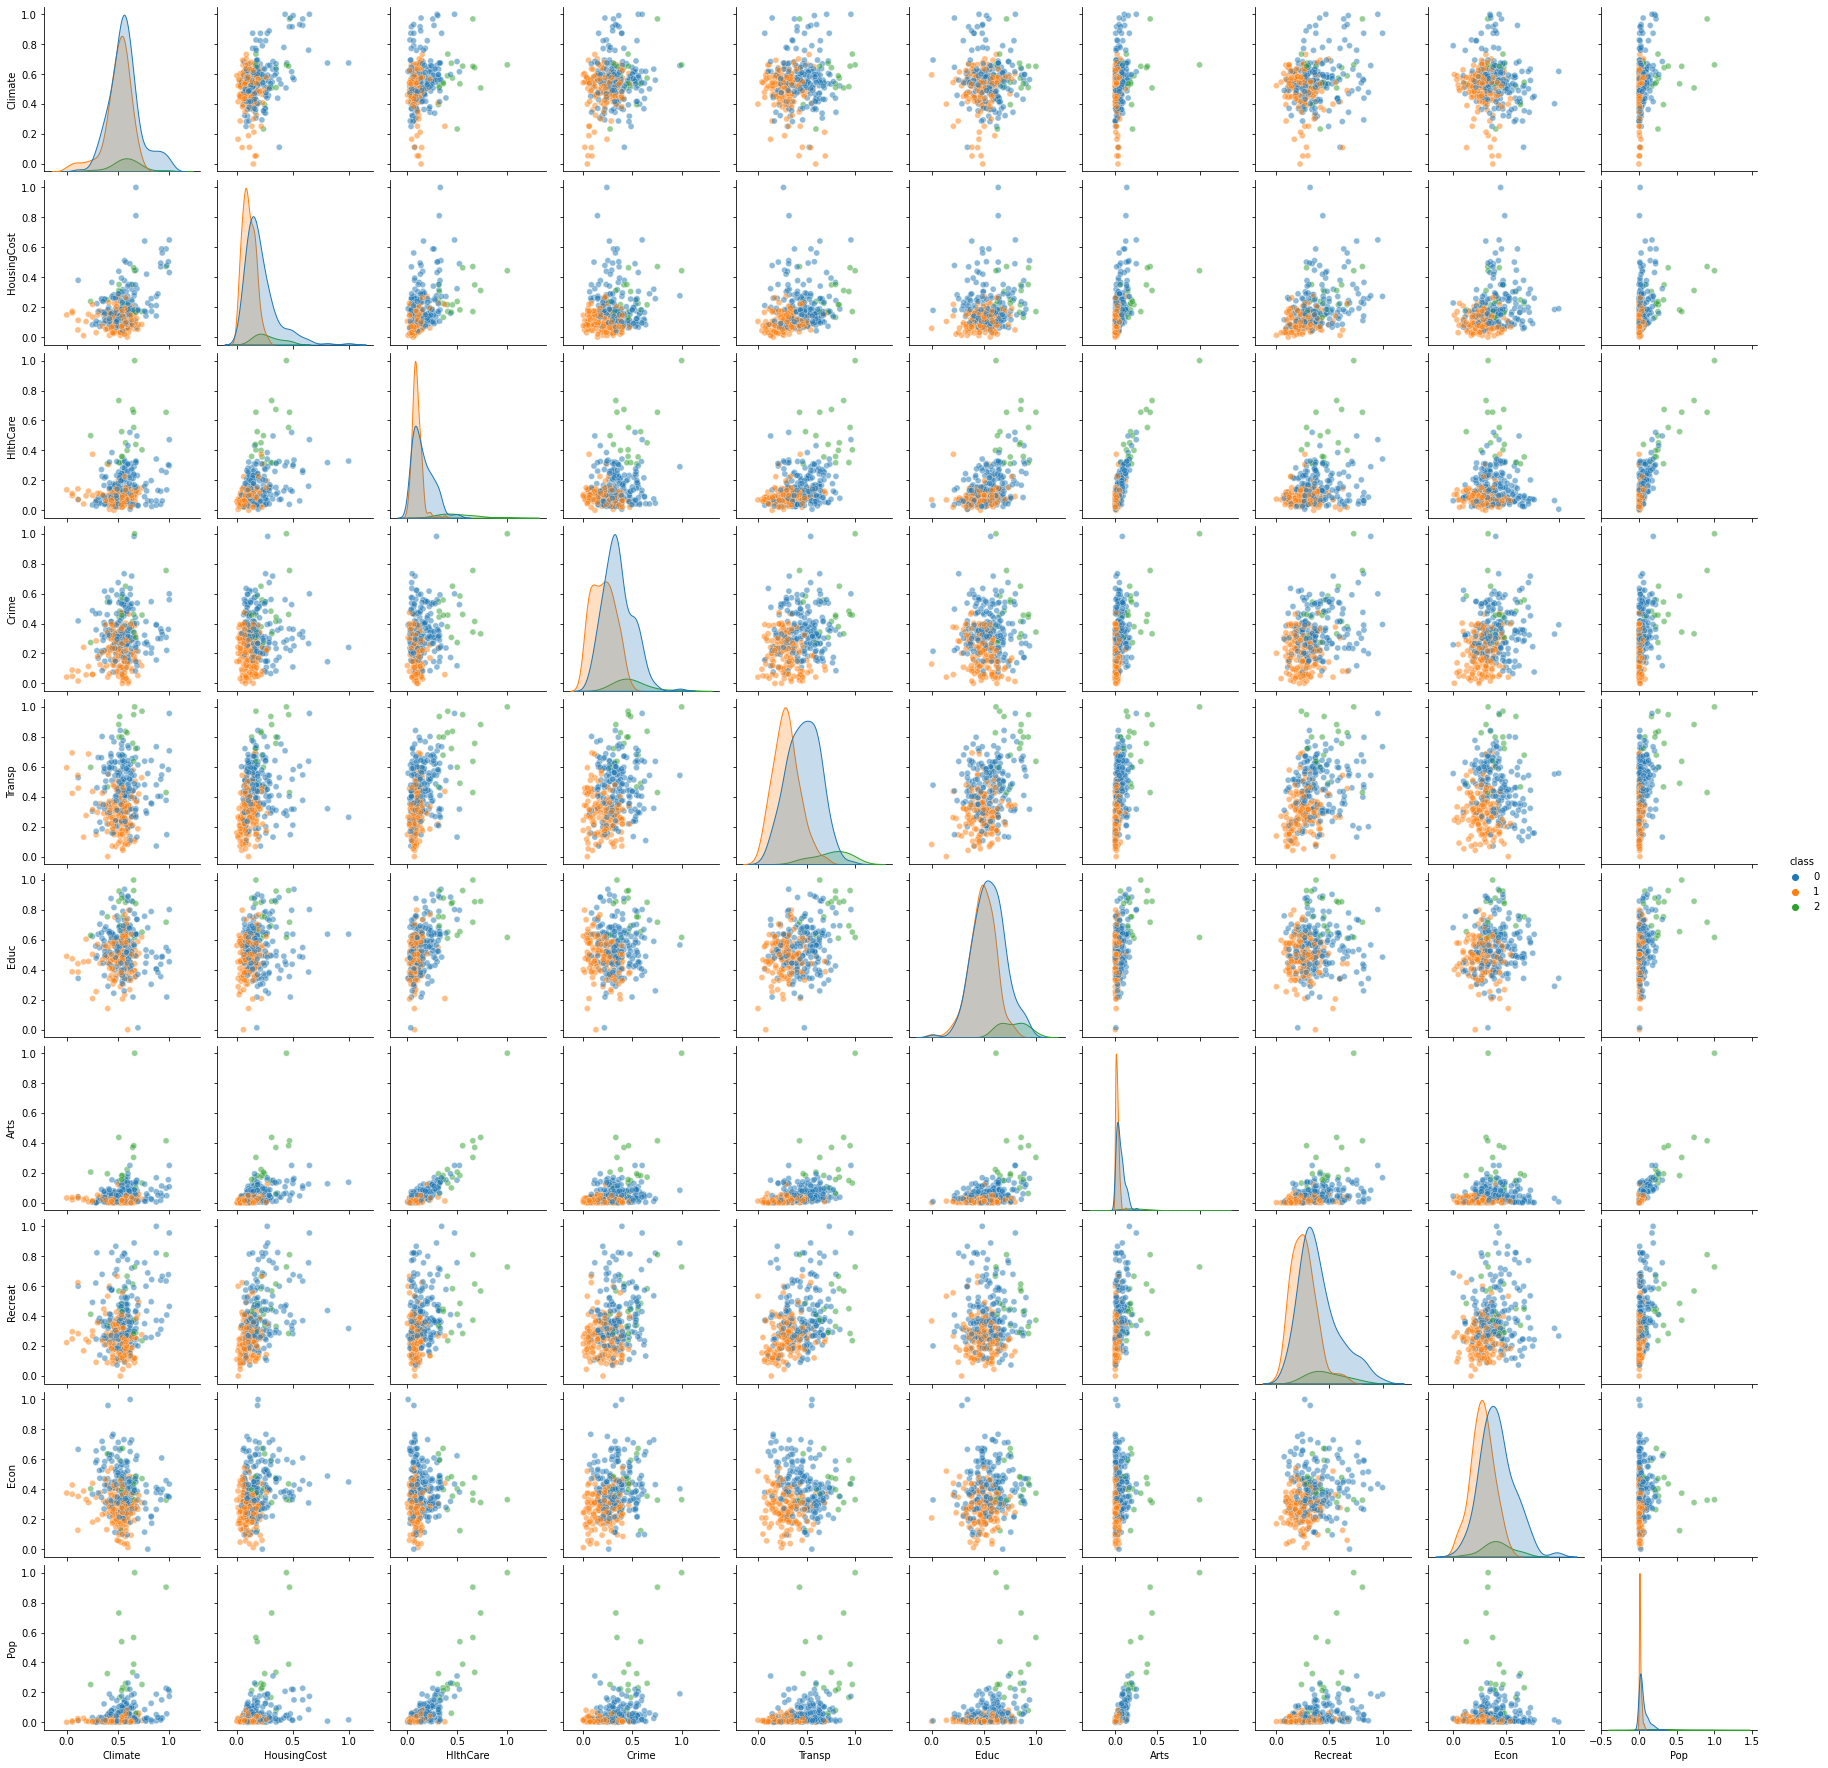

In [31]:
df['class'] = agglomerative.labels_
sns.pairplot(df, hue='class', plot_kws={'alpha':0.5}, palette="tab10")
plt.show()

In [32]:
df.drop(['class'], axis=1, inplace=True)

На большинстве признаков кластеры перемешаны между собой. Наиболее отчетливо кластеры различаются в строке TRansp и Pop:  0 кластер всегда имеет более маленькие значения, по сравнению с кластером 2. Кластер 1 больше похож на выбросы, поскольку точки внутри этого кластера сильно разбросаны, плотность мала.
Также хорошо видно расределение на паре признаков Crime-HousingCost.

2. DBSCAN

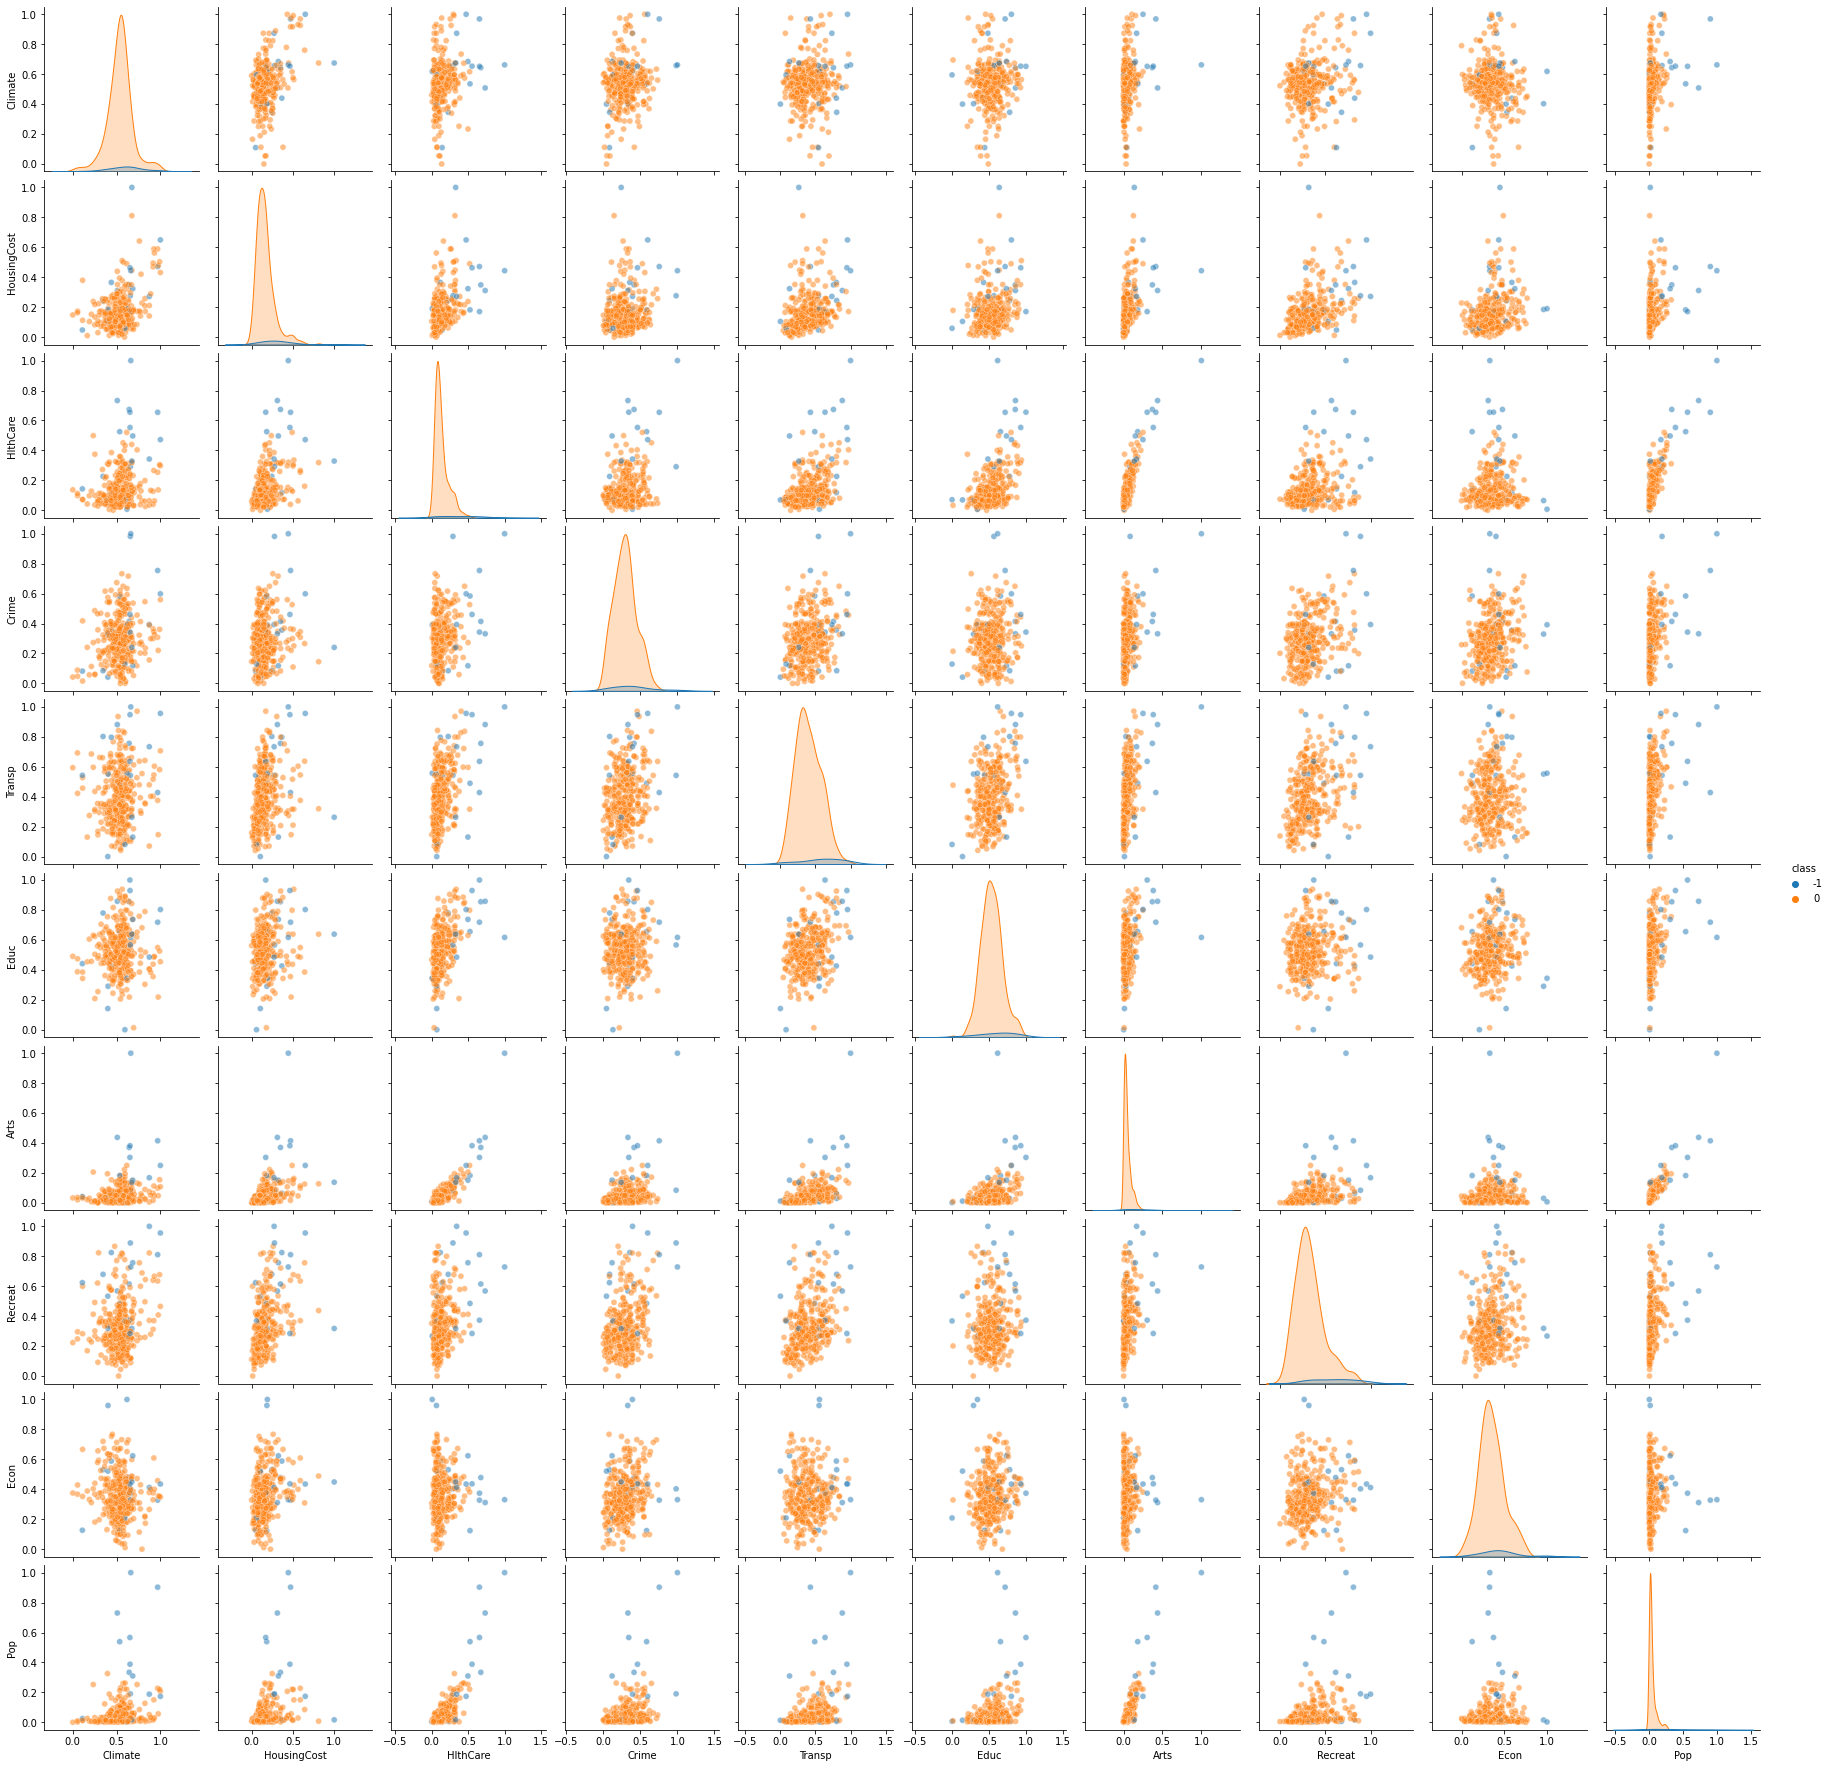

In [33]:
df['class'] = dbscan.labels_
sns.pairplot(df, hue='class', plot_kws={'alpha':0.5}, palette="tab10")
plt.show()

In [34]:
df.drop(['class'], axis=1, inplace=True)

DBSCAN смог только выделить шум.

3. Kmeans

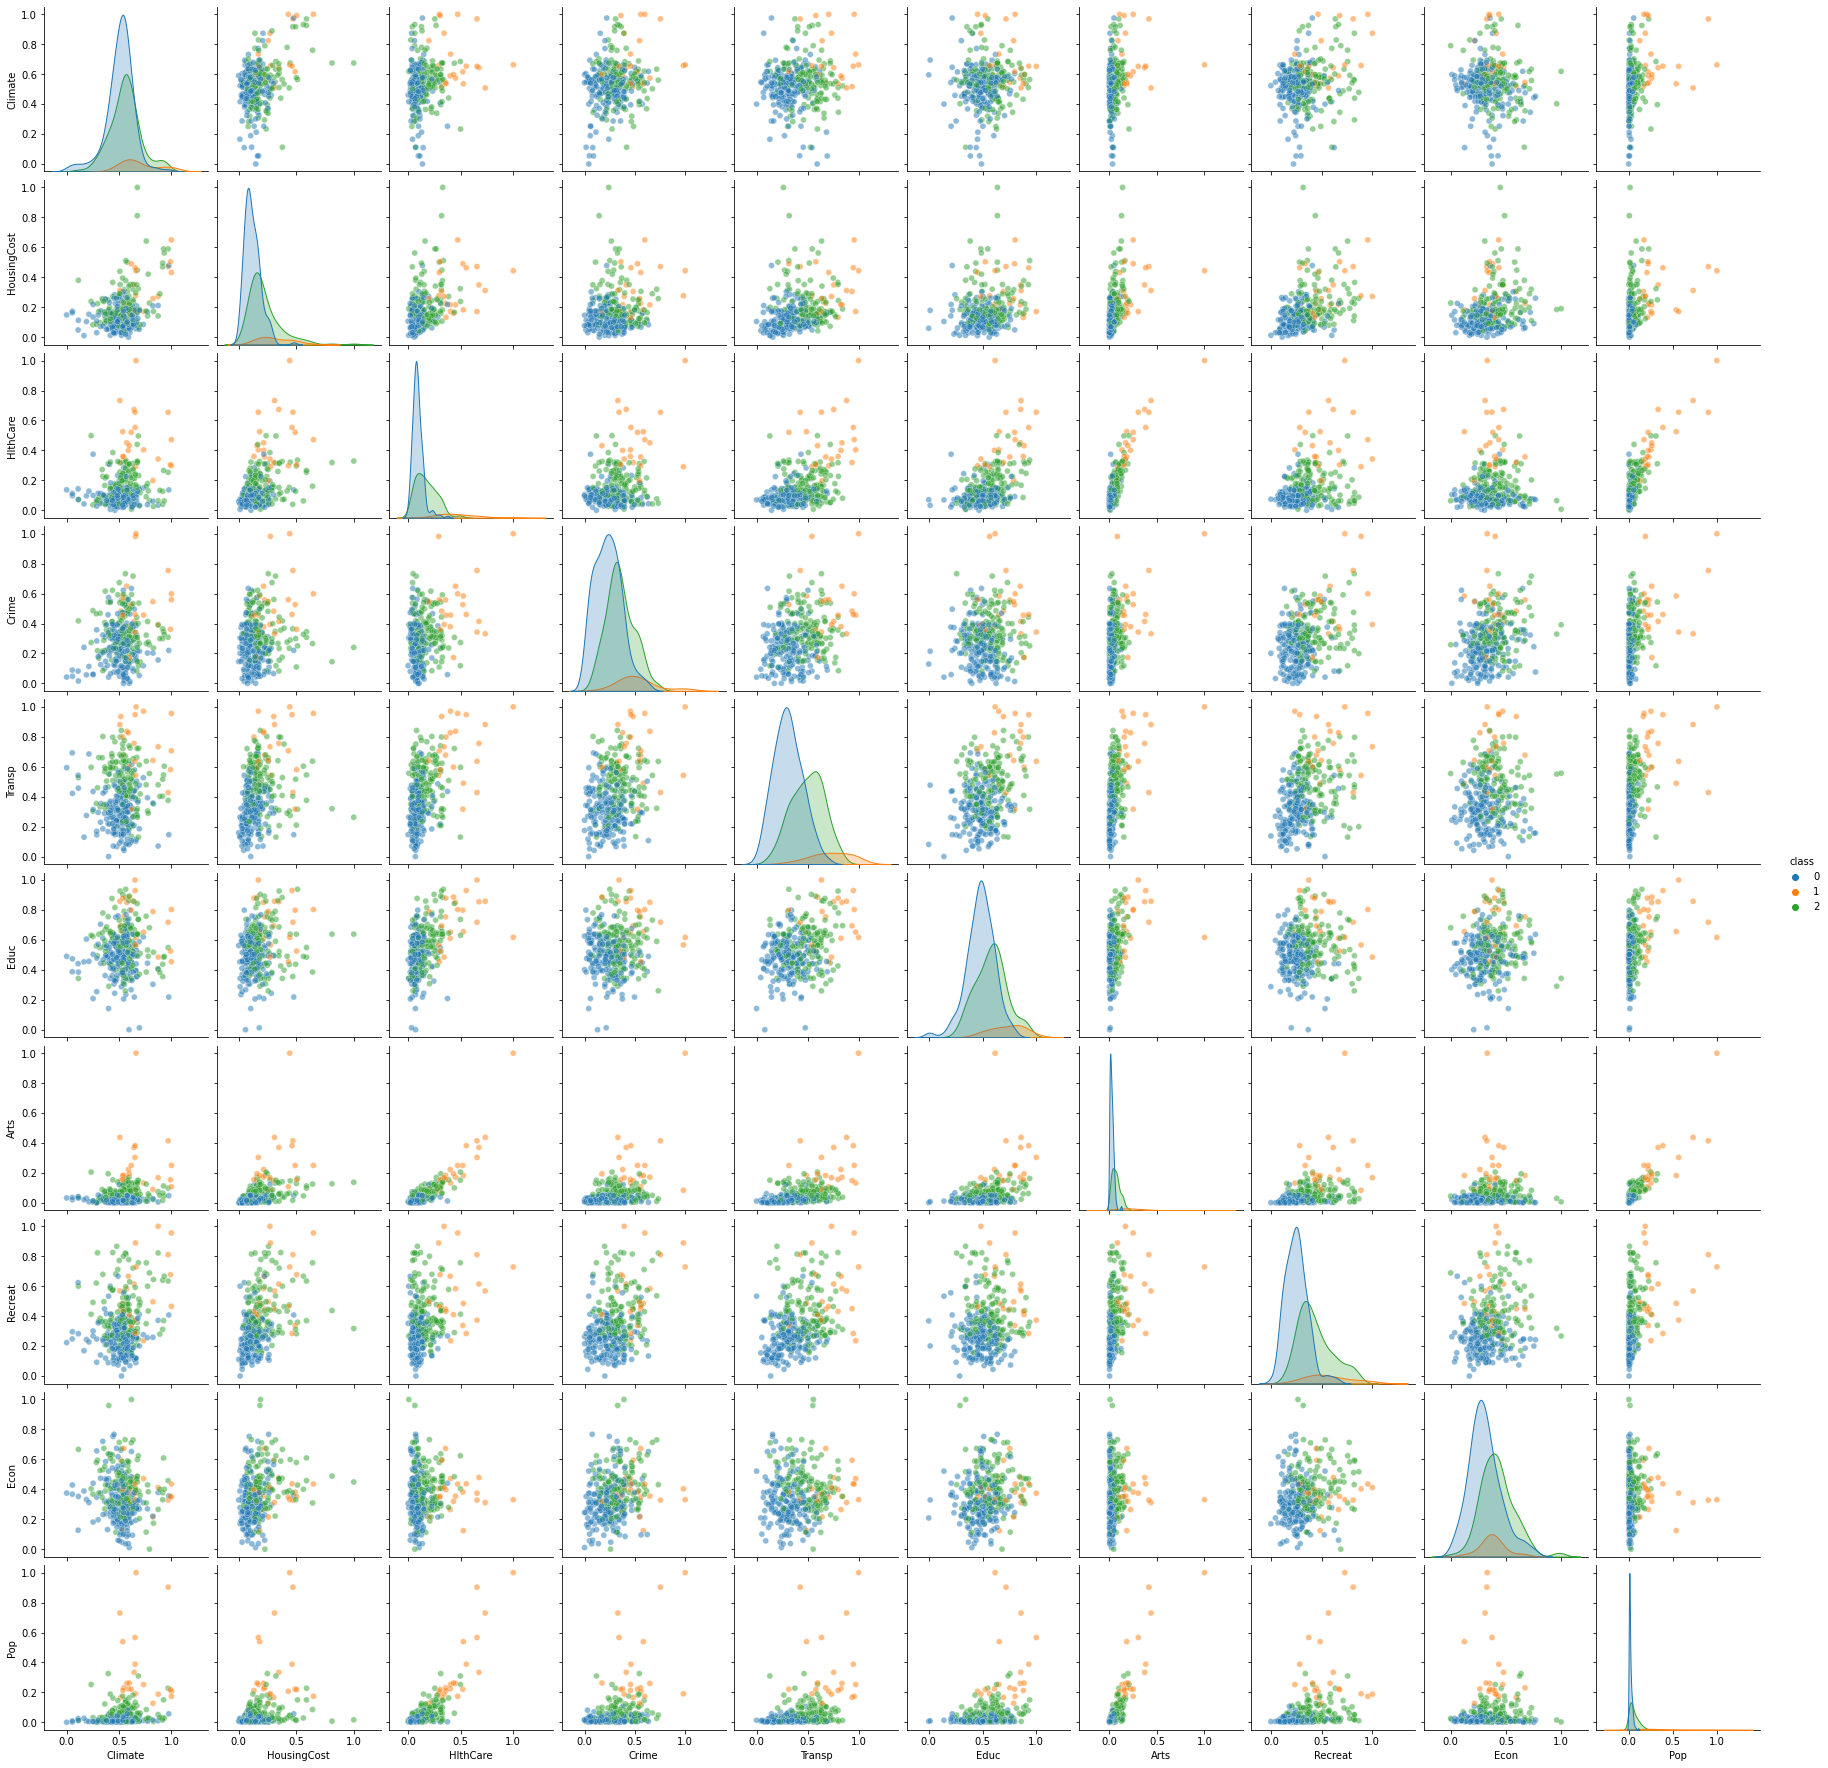

In [35]:
df['class'] = kmean.labels_
sns.pairplot(df, hue='class', plot_kws={'alpha':0.5}, palette="tab10")
plt.show()

In [36]:
df.drop(['class'], axis=1, inplace=True)

Кластеризация kmeans очень похожа на агломеративную, за исключением, что 1 кластер вбирает в себя более количество точек, что визуально выглядит более правильно и логично.

4. Gaussian Mixture

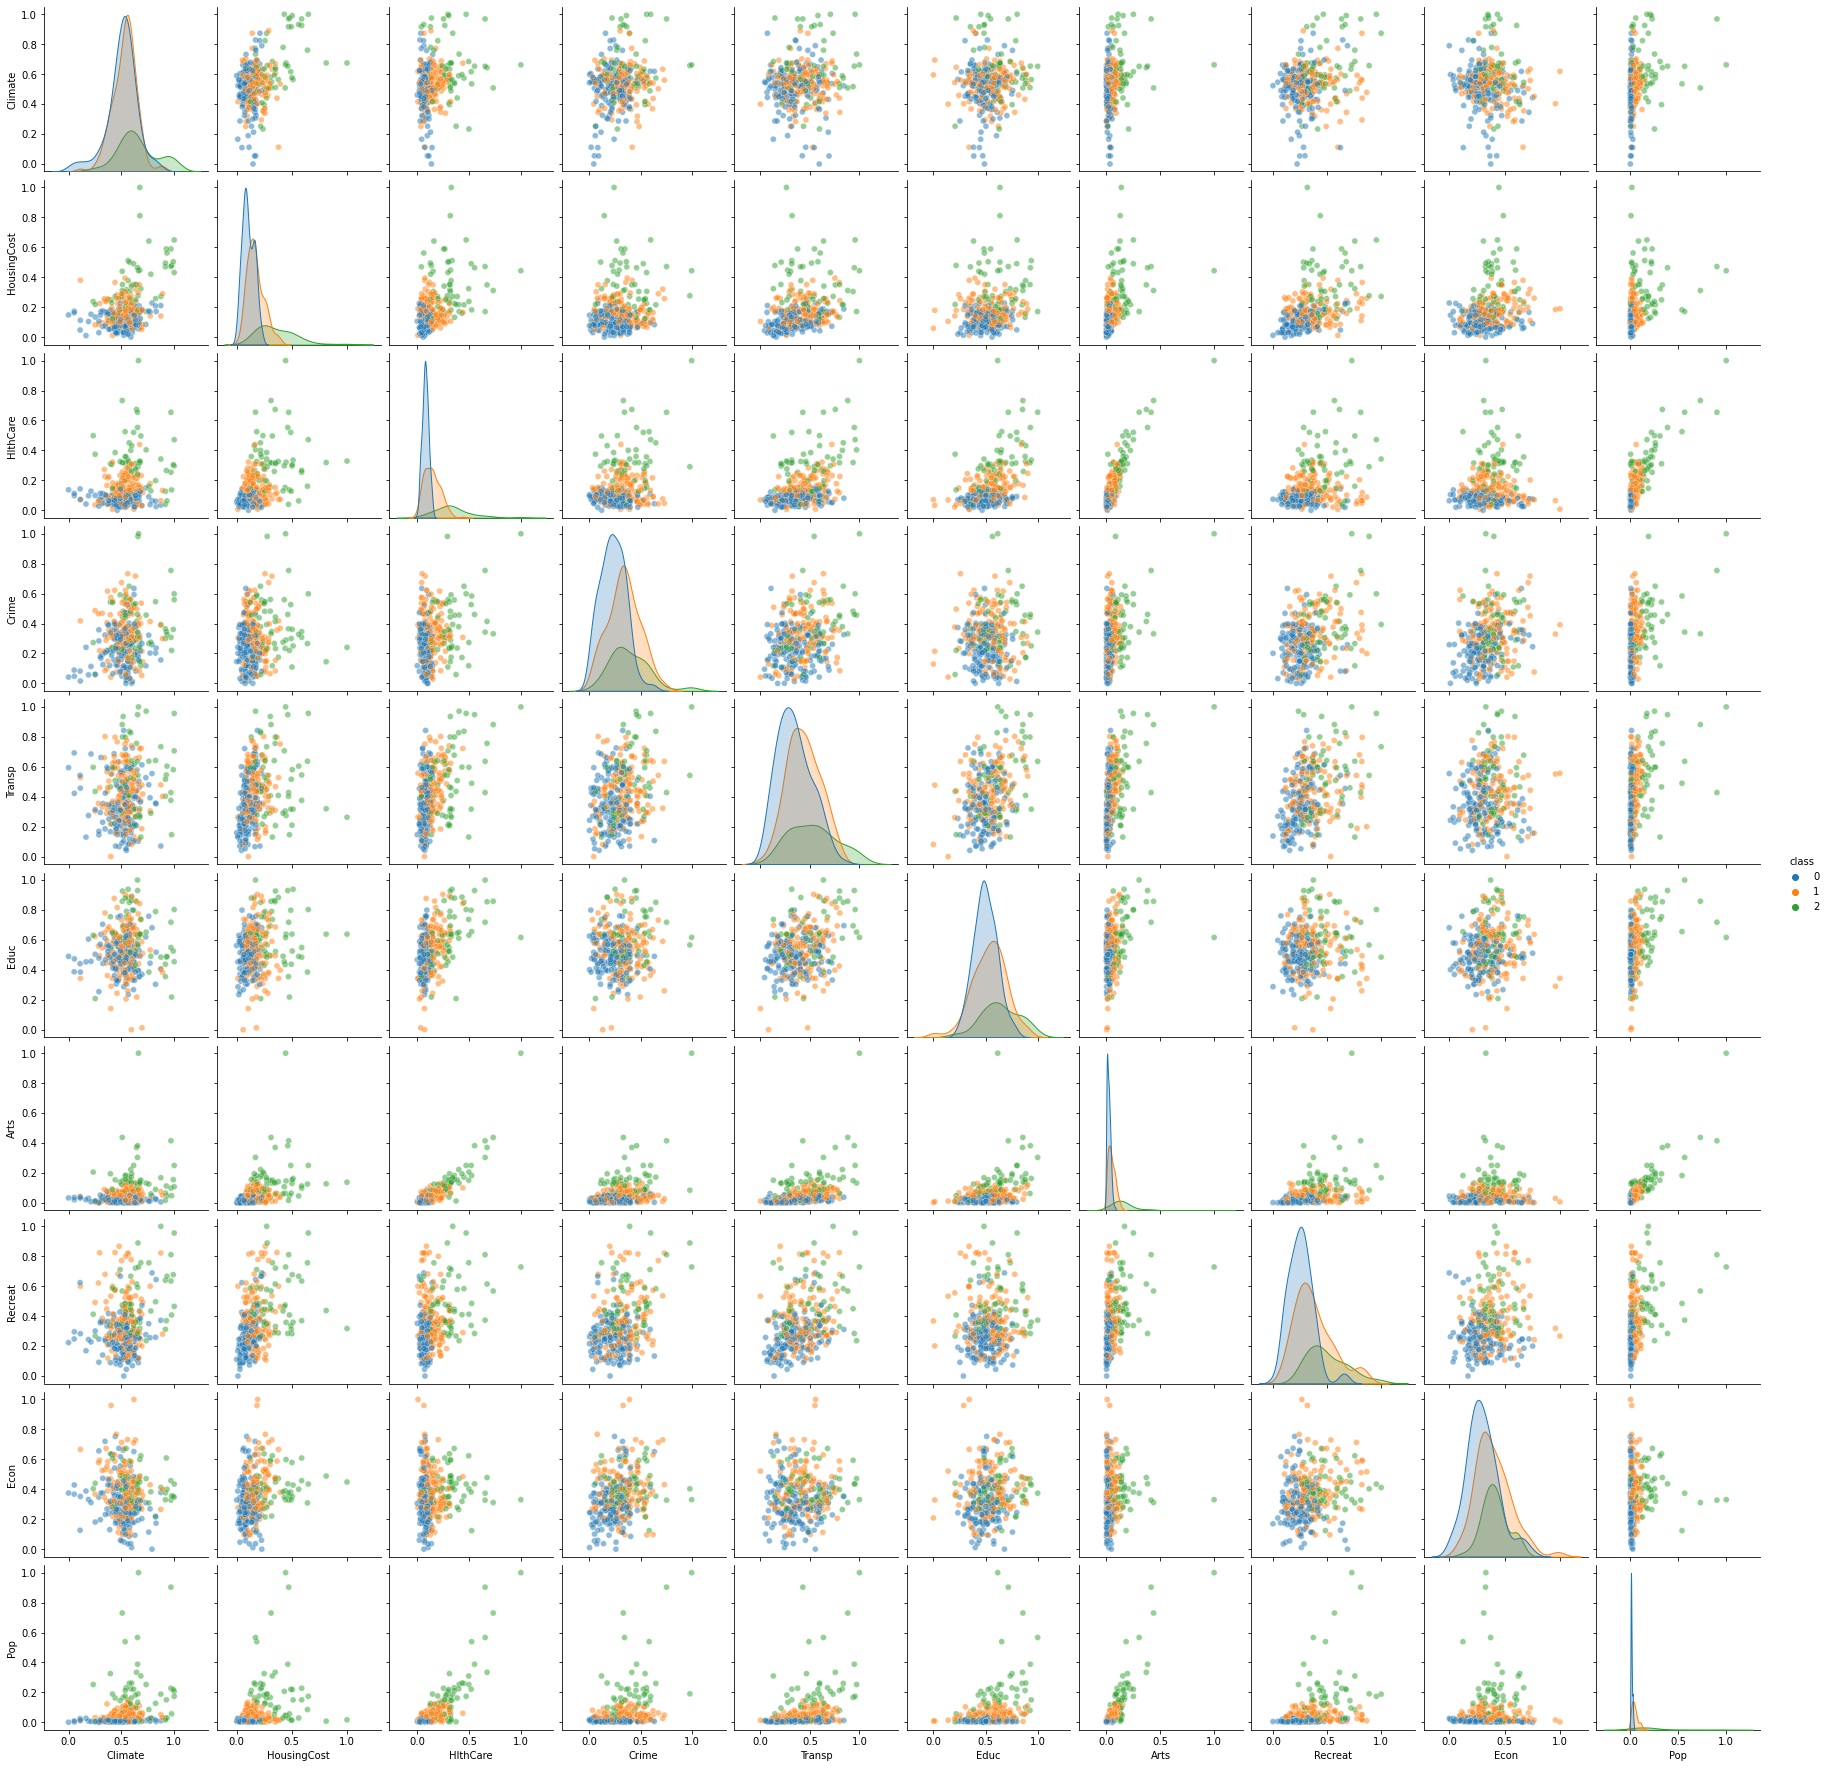

In [37]:
df['class'] = gmm.predict(df)
sns.pairplot(df, hue='class', plot_kws={'alpha':0.5}, palette='tab10')
plt.show()

Результаты Gаussian Mixture схожи с результатами kmeans, однако немного больше точек, определенные kmeans в 1 кластер, отнесены здесь ко 2. Из-за чего значение силуэта немного ниже.

Результаты Gaussian Mixture кажутся мне наиболее правильными на этом наборе данных.



## №7

Точки 0 кластера часто располагаются в левом нижнем углу графика, то есть значения точек для определенных признаков в среднем меньше, чем значения точек двух других кластеров. В это же время, 0 и 2 кластеры на некоторых признаках никак дистибутируются: их значения накладываются друг на друга. Это привело к тому, что DBSCAN объединил всё в 1 кластер.

2 кластер чаще всего находит между 1 и 0 кластерами, то есть его элементы обладают средними значениями по признакам. Это самый много численный класс.

1 кластер -- очень разряжен, его элементы обладают, как правило, наибольшими значениями по сранению с остальными кластерами (За исключением CRime и Econ). Этот кластер самый малочисленный. Некоторые его элементы были определены дбсканом как выбросы, что логично, ведь на графике они сильно удалены от общей массы точек. Агломеративаная кластеризация его многие точки отнесла к 2 кластеру.

Таким образом:

2 кластер -- города со средней численностью населения, средним (не жарким, не холодным) климатом, уровнем здравоохранения, часто хорошими возмодностями образования, уровнем культурного рейтинга, однако довольно высоким уровнем преступлений и малым количеством рекреационных объектов.

0 кластерм -- города с маленькой численностью населения, низкими затратами на жкх и тп., низким уровнем развития здравоохранения, низкими уровнем преступности, слаборазвитыми системами образования, культуры, рекреационных возможностей.

1 кластер -- крупные города, с большими возможностями для культурного развития и развлечений, высокими ценами жкх, развитой системой здравоохранения, средним уровнем преступности, часто с хорошими возможностями для образования.

## №8

In [38]:
df['Place'] = data['Place'].apply(lambda x: x.split(',')[-1].split('-')[0])

In [39]:
df

Climate  HousingCost  HlthCare     Crime    Transp      Educ      Arts  \
0    0.516770     0.056328  0.024849  0.280822  0.385829  0.507692  0.016651   
1    0.583851     0.161193  0.206609  0.263927  0.499733  0.354327  0.097225   
2    0.450932     0.117959  0.073652  0.302283  0.185294  0.412981  0.003263   
3    0.460870     0.148747  0.177789  0.137900  0.767112  0.816346  0.081192   
4    0.688199     0.174991  0.231843  0.536530  0.723663  0.637019  0.078387   
..        ...          ...       ...       ...       ...       ...       ...   
324  0.567702     0.192414  0.225695  0.169863  0.333957  0.768269  0.030551   
325  0.534161     0.069314  0.035097  0.364384  0.345722  0.379808  0.016651   
326  0.540373     0.173800  0.085820  0.060274  0.150000  0.577885  0.017110   
327  0.577640     0.100752  0.135007  0.287671  0.297995  0.586058  0.048419   
328  0.624845     0.146962  0.021647  0.397717  0.216979  0.329808  0.001235   

      Recreat      Econ       Pop  class Place  
0    0.245556  0.661572  0.005859      0    TX  
1    0.518222  0.188176  0.072759      1    OH  
2    0.124222  0.317952  0.006038      0    GA  
3    0.292667  0.406489  0.094136      1    NY  
4    0.513778  0.386734  0.043458      1    NM  
..        ...       ...       ...    ...   ...  
324  0.135556  0.287671  0.041414      1    MA  
325  0.408889  0.279885  0.013357      0    WA  
326  0.120444  0.274117  0.038776      1    PA  
327  0.228222  0.122422  0.057053      1    OH  
328  0.137333  0.237779  0.004768      0    CA  

[329 rows x 12 columns]

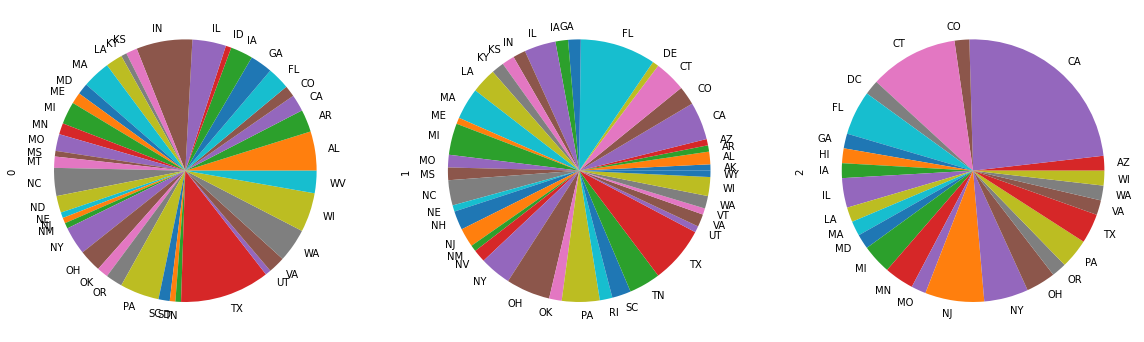

In [40]:
pd.crosstab(df['Place'], df['class']).plot(kind='pie', subplots=True, figsize=(20, 20), legend=False)
plt.show()

<AxesSubplot:xlabel='Place'>

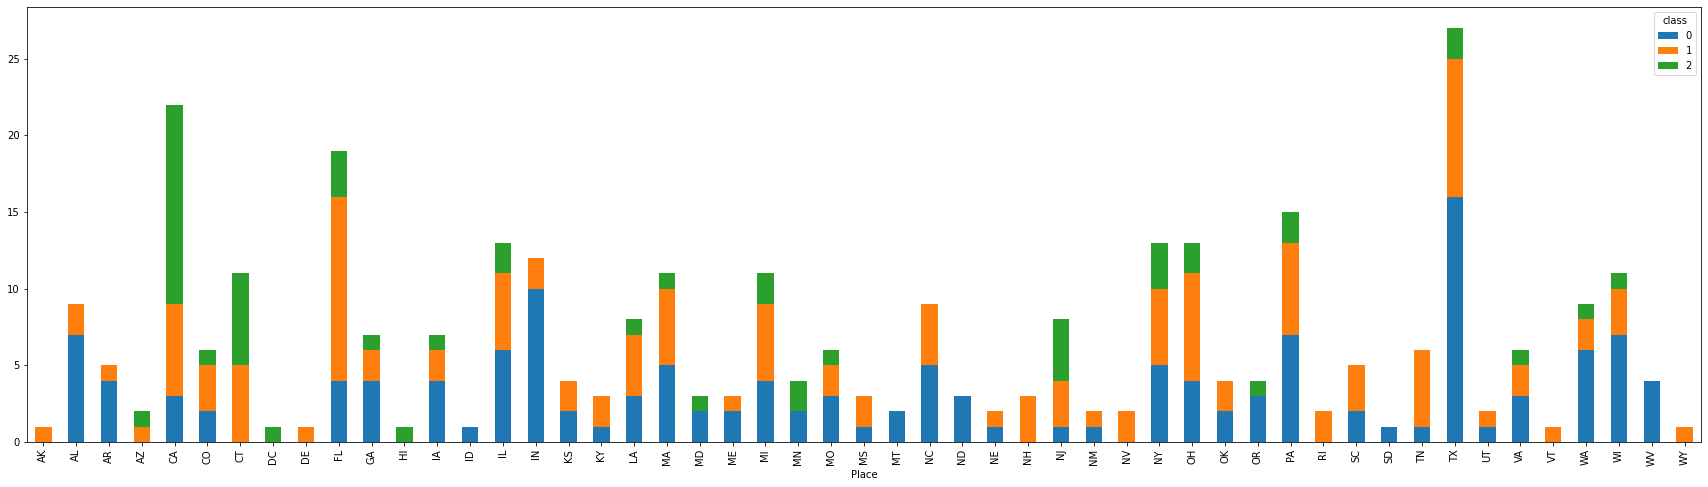

In [41]:
pd.crosstab(df['Place'], df['class']).plot(kind='bar', figsize=(30, 8), legend=True, stacked=True)

К кластеру 2 типа относятся города из разных штатов в равной степени, за исключением двух: Флорида и Техас.
Штаты, города которых входят в 0 кластер, также очень разнообразны, нельзя выделить какой-нибудь доминирующий, однако немного выделяется Техас.
В отличие от двух предыдущих кластеров, во 1 кластере очевидно доминирующая доля Калифорнии, города которой занимают примерно 25% от общего количества. За ней следуют Коннектикут и Нью-Джерси, количество городов которых совокупно также составляет около 25%.


В целом, в 0 кластер входит большое количество штатов, что логично, ведь 0 кластер отражает "средние" города. Наоборот, в кластер 1 входит меньшее количество штатов.

In [43]:
m = folium.Map(zoom_start=50)

df['Long'] = data['Long']
df['Lat'] = data['Lat']

for i in data.index:
    if df.loc[i, 'class'] == 0:
        folium.Marker(
            location=[df.loc[i, 'Lat'], df.loc[i, 'Long']],
            icon=folium.Icon(color="blue"),
        ).add_to(m)
    
    elif df.loc[i, 'class'] == 1:
        folium.Marker(
            location=[df.loc[i, 'Lat'], df.loc[i, 'Long']],
            icon=folium.Icon(color="green"),
        ).add_to(m)
        
    else:
        folium.Marker(
            location=[df.loc[i, 'Lat'], df.loc[i, 'Long']],
            icon=folium.Icon(color="red"),
        ).add_to(m)

m

Из карты видно, что крупные города сосредоточены на западном побережье в Калифорнии (где находится большее количество айти-предприятий и развиты промышленность и киноиндустрия) и на восточном побережье вокруг Нью-Йорка -- финансовой столицы США.